In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
# parameters
batch_size = 128
num_classes = 10
epochs = 3
img_rows, img_cols = 28, 28

In [3]:
# load data
#(x_train, y_train), (x_test, y_test) = mnist_fashion.load_data()
train_df = pd.read_csv("inputs/mnist_train.csv")
test_df = pd.read_csv("inputs/mnist_test.csv")
x_train = train_df.iloc[:,1:]
y_train = train_df[["label"]]
x_test = test_df.values
#y_test = test_df[["label"]]

#print(x_train.head())
#print(y_train.head())
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
#print(y_test.shape)

#Convert Dataframe to numpy array
x_train = x_train.values
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
print(x_train.shape)
y_train = y_train.values
print(type(y_train))
print(y_train.shape)

print(type(x_test))
#x_test = x_test.values
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#y_test = y_test.values

(42000, 784)
(42000, 1)
(28000, 784)
(42000, 28, 28, 1)
<class 'numpy.ndarray'>
(42000, 1)
<class 'numpy.ndarray'>


In [4]:
print (x_train.shape)
print (x_test.shape)
print(x_train.shape[0])
# reshape data
#x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

##After Reshape
print(x_train.shape)
print(x_test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)
42000
(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [5]:
# convert to 0-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (42000, 28, 28, 1)
42000 train samples
28000 test samples


In [6]:
print("Before Conversion:", y_train[1:10,])
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

print("After Conversion:", y_train[1:10,])

Before Conversion: [[0]
 [1]
 [4]
 [0]
 [0]
 [7]
 [3]
 [5]
 [3]]
After Conversion: [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]


[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


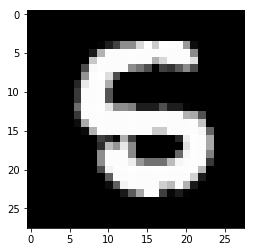

In [7]:
# display a training image
plt.imshow(x_train[19,:,:,0], cmap='gray')
print(y_train[19])

In [8]:
# define model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
# compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [10]:
# print model summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [11]:
model_checkpoint = keras.callbacks.ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5')
csv_logger = keras.callbacks.CSVLogger('training.log')

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/3
42000/42000 [==============================] - 154s - loss: 0.3767 - acc: 0.8843   
Epoch 2/3
42000/42000 [==============================] - 166s - loss: 0.1261 - acc: 0.9626   
Epoch 3/3
42000/42000 [==============================] - 163s - loss: 0.0940 - acc: 0.9722   


In [ ]:
y_test = model.predict(x_test)

In [ ]:
print(y_test.shape)
results=np.argmax(y_test, axis=1)

dict= {'ImageId': range(1, y_test.shape[0]+1), 'Label':results}
results_df = pd.DataFrame(data=dict)
results_df.to_csv("outputs/mnist_results.csv", index=False)
print(results_df.shape)
#pd.DataFrame(ImageId=range(1,y_test.shape[0]+1), Label=results)